In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
from sklearn.datasets import load_iris
iris=load_iris()
dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [11]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [12]:
df['target']=iris.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [13]:
iris.target_names
df['flower_names']=df.target.apply(lambda x : iris.target_names[x])
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [16]:
df0=df[df.target==0]
df1=df[df.target==1]
df2=df[df.target==2]


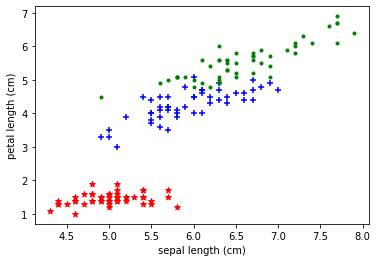

In [21]:
%matplotlib inline
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')

plt.scatter(df0['sepal length (cm)'],df0['petal length (cm)'],color='red',marker='*')
plt.scatter(df1['sepal length (cm)'],df1['petal length (cm)'],color='blue',marker='+')
plt.scatter(df2['sepal length (cm)'],df2['petal length (cm)'],color='green',marker='.')

In [26]:
X=df.drop(['target','flower_names'],axis='columns')
Y=df.target

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)


In [37]:
from sklearn.svm import SVC
model=SVC()
model.fit(x_train,y_train)

SVC()

In [38]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [44]:
ans=model.predict([[7,5,8,6]])
len(ans)
def flower_type():
 for i in range(len(ans)):
    if(ans[i]==0):
        print('setosa')
    elif(ans[i]==1):
        print('versicolor')
    else:
        print('virginica')

        
flower_type()        

virginica


In [45]:
model.score(x_test,y_test)

0.9666666666666667

In [46]:
from joblib import dump,load
dump(model,'flower_type_predictor')

['flower_type_predictor']